# Transform the unit circle

Let's get the $\mathbb{R}^2$ unit circle and apply a non-singular linear transformation
$A = \left[\begin{array}{cc} 1 & -3\\-2 & 2 \end{array} \right]$
to see how it behaves.

In [2]:
import numpy
import matplotlib.pyplot as plt
import scipy.linalg
pi = numpy.pi

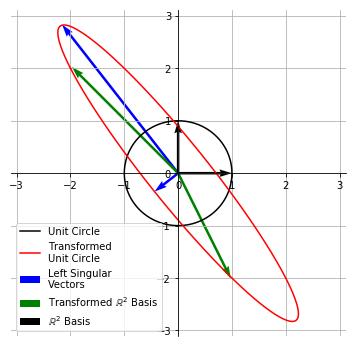

In [50]:
unitCircle = numpy.transpose(numpy.array([ [numpy.sin(t), numpy.cos(t)] for t in numpy.linspace(0, 2*pi, 100) ]))
matrix = numpy.array([
    [ 1, -2],
    [-2,  2]
])
transformedUnitCircle = matrix @ unitCircle

leftSingularVectors, sigma, rightSingularVectors = scipy.linalg.svd(matrix)
leftSingularVectors = matrix @ leftSingularVectors
r2Basis = numpy.eye(matrix.shape[0])
transformedR2Basis = matrix @ r2Basis

fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(unitCircle[0,:], unitCircle[1,:], color='k', linestyle='-', label='unit circle'.title())
ax.plot(transformedUnitCircle[0,:], transformedUnitCircle[1,:], color='r', linestyle='-', label='transformed\nunit circle'.title())
origin = [ [0, 0], [0, 0] ]
ax.quiver(*origin, leftSingularVectors[0,:], leftSingularVectors[1,:], color='b', label='left singular\nvectors'.title(), scale_units='xy', scale=1)
ax.quiver(*origin, transformedR2Basis[0,:], transformedR2Basis[1,:], color='g', label='Transformed $\mathbb{R}^2$ Basis', scale_units='xy', scale=1)
ax.quiver(*origin, r2Basis[0,:], r2Basis[1,:], color='k', label='$\mathbb{R}^2$ Basis', scale_units='xy', scale=1)

ax.grid(True)
ax.legend(loc='best')

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ymax = xmax = numpy.max((xmax, ymax))
ymin = xmin = numpy.min((xmin, ymin))
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()
plt.close(fig)